<h1>UNAD</h1>
<h2>Eduar Yesid González Gómez</h2>
<h2>Predicción de Diabetes con Regresión Logística </h2>

<h1>Pasos de la Actividad</h1>

<div><p>1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</p> </div>
<div><p>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. </p> </div>
<div><p>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. </p> </div>
<div><p>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. </p> </div>
<div><p>5. Entrenar el modelo configurando los diferentes hiperparámetros. </p> </div>
<div><p>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. </p> </div>
<div><p>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</p> </div>
<div><p>8. Interpretar, analizar y documentar los resultados obtenidos. </p> </div>
<div><p>9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/. </p> </div>




<h3> 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</h3>

In [75]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix



In [76]:
rawData = pd.DataFrame(pd.read_csv('./heart_cleveland_upload.csv'))

In [77]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [78]:
rawData.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [79]:
# Descripción de los datos
rawData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

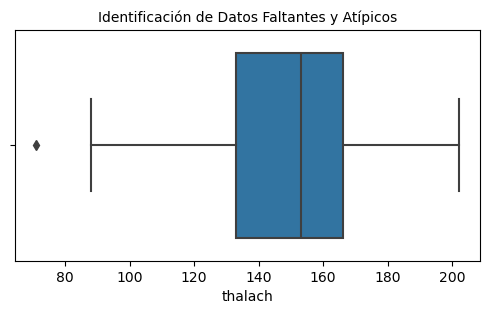

In [80]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

<h3> 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</h3>


In [81]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Nivel de Glucosa: ",rawData['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",rawData['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",rawData['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Insulina: ",rawData['thalach'].isin([0]).sum())


Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Grosor Piel:  0
Cantidad de Registros con cero en Nivel Insulina:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

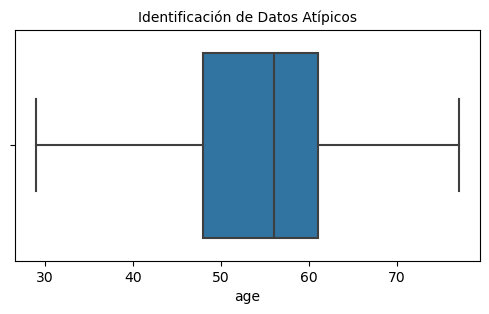

In [82]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

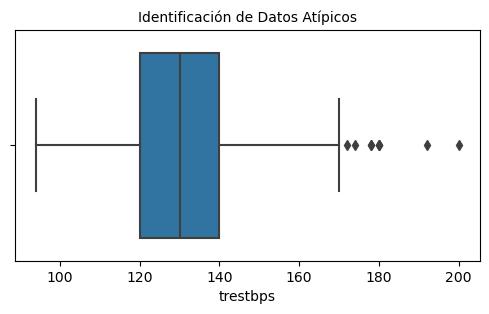

In [83]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [84]:
#Conteo de Datos Atípicos

nivel_minimo=100
nivel_maximo=190
Total_Atipicos=((rawData['trestbps']<nivel_minimo)|(rawData['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 4


In [85]:
# Filtra Datos Atípicos

rawData=rawData[(rawData['trestbps']<nivel_maximo)&(rawData['trestbps']>nivel_minimo)]

In [86]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((rawData['trestbps']<nivel_minimo)|(rawData['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

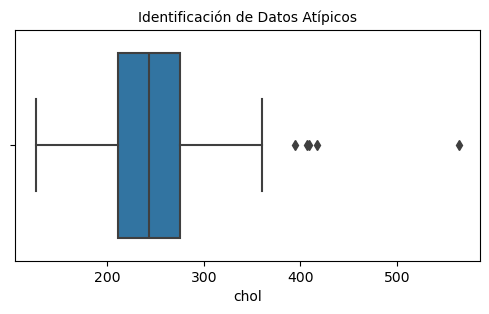

In [87]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [88]:
#Conteo de Datos Atípicos

nivel_minimo=110
nivel_maximo=400
Total_Atipicos=((rawData['chol']<nivel_minimo)|(rawData['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 4


In [89]:
# Filtra Datos Atípicos

rawData=rawData[(rawData['chol']<nivel_maximo)&(rawData['chol']>nivel_minimo)]

In [90]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((rawData['chol']<nivel_minimo)|(rawData['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

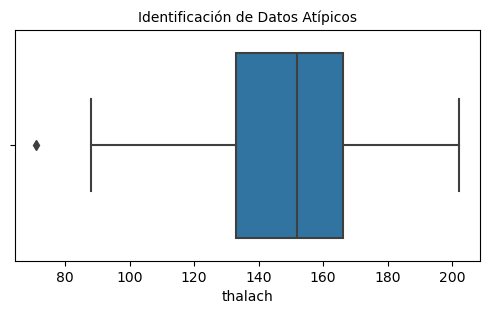

In [91]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [92]:
#Conteo de Datos Atípicos

nivel_minimo=60
nivel_maximo=190
Total_Atipicos=((rawData['thalach']<nivel_minimo)|(rawData['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [93]:
# Filtra Datos Atípicos

rawData=rawData[(rawData['chol']<nivel_maximo)&(rawData['chol']>nivel_minimo)]

In [94]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((rawData['chol']<nivel_minimo)|(rawData['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [95]:
#Revisión del tipo de datos y datos faltantes

rawData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 15 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        30 non-null     int64  
 1   sex        30 non-null     int64  
 2   cp         30 non-null     int64  
 3   trestbps   30 non-null     int64  
 4   chol       30 non-null     int64  
 5   fbs        30 non-null     int64  
 6   restecg    30 non-null     int64  
 7   thalach    30 non-null     int64  
 8   exang      30 non-null     int64  
 9   oldpeak    30 non-null     float64
 10  slope      30 non-null     int64  
 11  ca         30 non-null     int64  
 12  thal       30 non-null     int64  
 13  condition  30 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 3.5 KB


<h3> 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características</h3>

<h5>Caracterstica de interes:</h5>

<div>
    <p> sexo: sexo (1 = masculino; 0 = femenino)</p>
    
</div>


In [96]:
rawData['sex'].value_counts()

sex
1    23
0     7
Name: count, dtype: int64

In [46]:
print(rawData)

sex
1    23
0     7
Name: count, dtype: int64


<h3>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo</h3>

In [97]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = rawData.drop('sex',axis=1) # Se cargan los datos de train sin los datos de la columna sexo 
Y = rawData['sex'] # Se cargan los datos de train con los datos de la la columna sexo

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [98]:
print (X_train)

     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
146   42   2       130   180    0        0      150      0      0.0      0   
282   43   3       120   177    0        2      120      1      2.5      1   
93    60   2       140   185    0        2      155      0      3.0      1   
172   65   3       120   177    0        0      140      0      0.4      0   
15    52   0       118   186    0        2      190      0      0.0      1   
95    60   2       120   178    1        0       96      0      0.0      0   
68    41   1       120   157    0        0      182      0      0.0      0   
291   40   3       110   167    0        2      114      1      2.0      1   
137   44   2       108   141    0        0      175      0      0.6      1   
237   56   3       132   184    0        2      105      1      2.1      1   
57    45   1       112   160    0        0      138      0      0.0      1   
210   59   3       164   176    1        2       90      0      

In [99]:
print (Y_train)

146    1
282    1
93     1
172    1
15     1
95     0
68     1
291    1
137    0
237    1
57     0
210    1
105    1
129    1
230    1
135    0
295    0
157    1
194    1
128    1
279    1
211    1
Name: sex, dtype: int64


<h3> 5. Entrenar el modelo configurando los diferentes hiperparámetros</h3>

In [107]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [101]:
print (Y_test)

184    1
22     1
156    0
290    1
186    0
245    1
104    1
120    1
Name: sex, dtype: int64


In [102]:
print (Prediccion)

[1 1 1 1 1 1 1 1]


<h3>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</h3>

In [103]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo</h3>

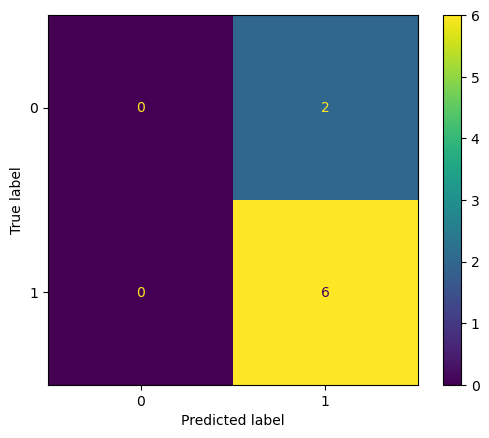

In [104]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

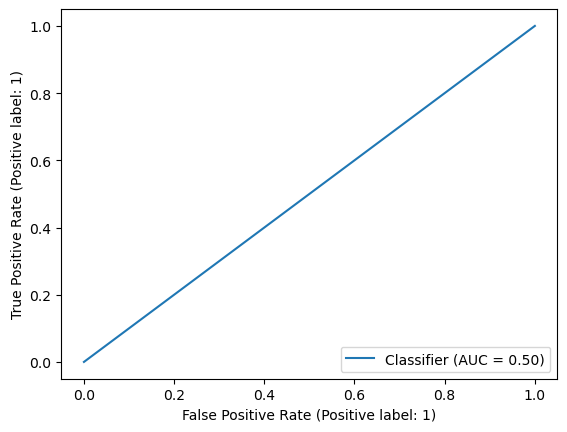

In [105]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

<h3>8. Interpretar, analizar y documentar los resultados obtenidos</h3>